In [3]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *
from Utils.metrics_summary import *

from Models.RNN_paper_prototype import *


2024-03-14 23:58:25.860754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 23:58:25.860976: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 23:58:25.861105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
original_df = dataframe_init(gpu_token)
vectors = vec_split(original_df)
word2vec_init(original_df, vectors, gpu_token)
tensors = tensor_gen(vectors)

2024-03-14 23:58:30.241692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 23:58:30.241927: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 23:58:30.242071: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model = model_ver_1(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 2)                

In [7]:
history = model.fit(tensors[0], tensors[2], epochs=20)
y_pred = model.predict(tensors[1])

Epoch 1/20
131/131 [==============================] - 136s 1s/step - loss: 0.0135 - accuracy: 0.9736
Epoch 2/20
131/131 [==============================] - 134s 1s/step - loss: 0.0106 - accuracy: 0.9813
Epoch 3/20
131/131 [==============================] - 134s 1s/step - loss: 0.0104 - accuracy: 0.9813
Epoch 4/20
131/131 [==============================] - 134s 1s/step - loss: 0.0100 - accuracy: 0.9813
Epoch 5/20
131/131 [==============================] - 134s 1s/step - loss: 0.0099 - accuracy: 0.9813
Epoch 6/20
131/131 [==============================] - 135s 1s/step - loss: 0.0097 - accuracy: 0.9813
Epoch 7/20
131/131 [==============================] - 134s 1s/step - loss: 0.0097 - accuracy: 0.9813
Epoch 8/20
131/131 [==============================] - 134s 1s/step - loss: 0.0096 - accuracy: 0.9813
Epoch 9/20
131/131 [==============================] - 134s 1s/step - loss: 0.0096 - accuracy: 0.9813
Epoch 10/20
131/131 [==============================] - 134s 1s/step - loss: 0.0097 - accura

In [8]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [9]:
score_summary(classified_labels, classified_outputs, 0)
score_summary(classified_labels, classified_outputs, 1)


For secure:
f1 score:  0.9903100775193798
precision score:  0.980806142034549
recall score:  0

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0



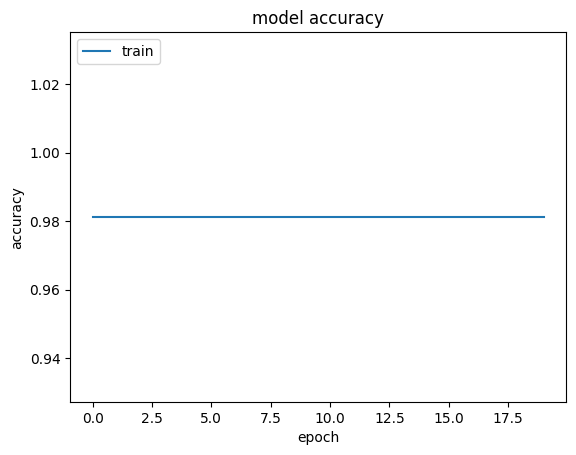

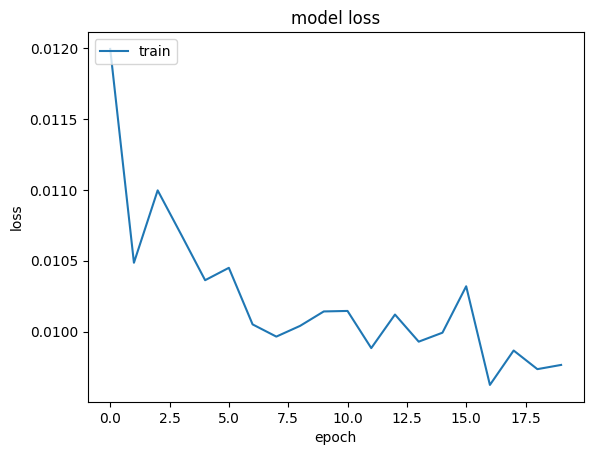

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in vectors[1].Label:
    if i == [0,1]:
        print(i)

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


In [ ]:
!nvidia-smi

Tue Mar 12 00:07:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   37C    P8     5W / 151W |   7888MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------